In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('IBM.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,78.800003,80.570000,78.190002,80.570000,53.418415,7864500
1,2003-01-03,80.699997,81.650002,80.209999,81.650002,54.134457,5962300
2,2003-01-06,81.900002,84.800003,81.809998,83.589996,55.420681,7921300
3,2003-01-07,83.949997,86.180000,83.750000,86.000000,57.018513,11906900
4,2003-01-08,85.550003,85.690002,84.070000,84.190002,55.818470,9508800


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
def moving_average(df,column,date_start,date_end,date_predict,use_weights=False,verbose=0,decay=0.9):
    date_start = pd.to_datetime(date_start)
    date_predict = pd.to_datetime(date_predict)
    date_end = pd.to_datetime(date_end)
    df = df[(df['Date']>=date_start) & (df['Date']<=date_predict)]
    ground_truth = df[(df['Date']>=date_end) & (df['Date']<=date_predict)]
    dates = ground_truth['Date'].astype(str).values
    ground_truth = ground_truth[column].values
    len_predict = len(ground_truth)
    X = df[(df['Date']>=date_start) & (df['Date']<=date_end)][column].values
    to_use = list(X.copy())
    predicted = []
    for i in range(len_predict):
        if not use_weights:
            weights = [1 for i in range(len(to_use))]
        else:
            weights = [decay**i for i in range(len(to_use))[::-1]]
        averaged = sum([i*weights[c] for c,i in enumerate(to_use)])/sum(weights)
        to_use.append(averaged)
        predicted.append(averaged)
    if verbose:
        error = mean_squared_error(y_true=ground_truth,y_pred=predicted)
        print('MSE : {0}'.format(error))
        plt.figure(figsize=(15,12))
        if use_weights:
            title = 'Weighted moving average on field {0} with decay of : {1}'.format(column,decay)
        else:
            title = 'Moving average on field {0}'.format(column)
        plt.title(title)
        plt.plot(range(len(ground_truth)),ground_truth,'--o')
        plt.plot(range(len(predicted)),predicted,'-o')
        plt.ylim([0,df[column].max()*2])
        plt.yticks(np.arange(0,max(df[column].values)*2,2.5))
        plt.ylabel('Values')
        plt.xlabel('Date')
        plt.xticks(range(len(predicted)),dates,rotation=30)
        plt.legend(['Real values','Predicted'])
        
    
    

    

MSE : 22.464272542227054


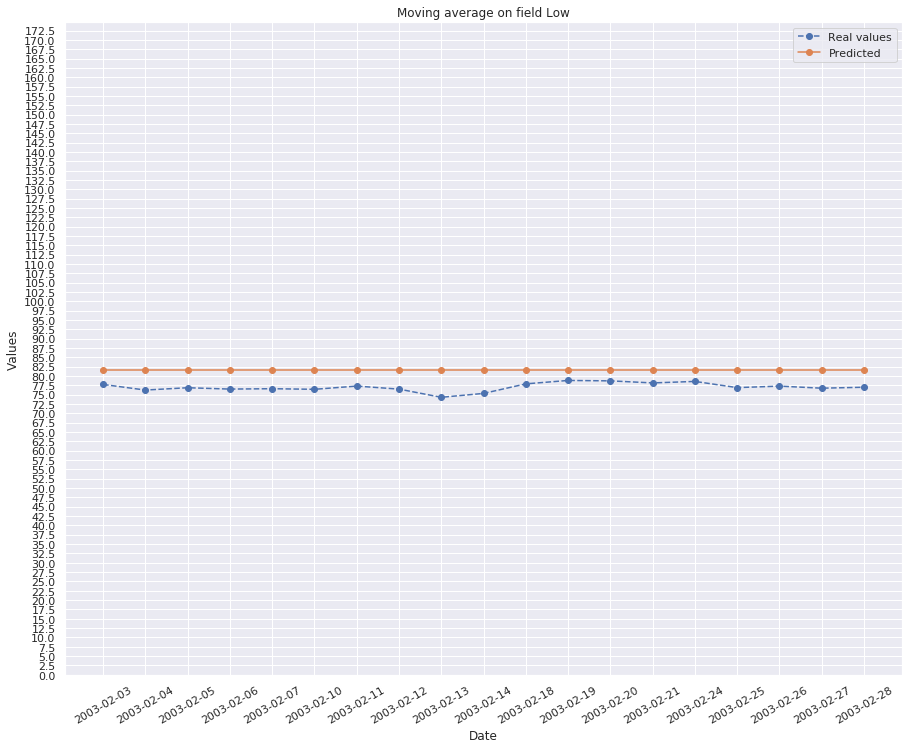

In [81]:
moving_average(df,'Low','2003-01-02','2003-02-02','2003-03-02',verbose=1,use_weights=False,decay=0.1)